In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('whitegrid')

In [5]:
data_path='../../hms-harmful-brain-activity-classification'
test_eeg_path='train_eegs'


In [143]:
df_train=pd.read_csv(f'{data_path}/train.csv')
df_train['vote_count']=df_train[vote].sum(axis=1)
df_train.pivot_table(index='expert_consensus', columns='vote_count', values='eeg_id', aggfunc='count')

vote_count,1,2,3,4,5,6,7,10,11,12,...,19,20,21,22,23,24,25,26,27,28
expert_consensus,,,,,,,,,,,,,,,,,,,,,
GPD,851.0,226.0,3771.0,767.0,636.0,374.0,NaN,66.0,175.0,522.0,...,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRDA,337.0,184.0,12731.0,69.0,138.0,19.0,NaN,284.0,574.0,748.0,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LPD,1032.0,483.0,3539.0,1260.0,897.0,205.0,NaN,241.0,598.0,760.0,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LRDA,195.0,67.0,9379.0,366.0,344.0,59.0,NaN,430.0,741.0,1029.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other,1835.0,1095.0,4414.0,560.0,497.0,187.0,NaN,108.0,501.0,1227.0,...,135.0,616.0,179.0,54.0,24.0,17.0,20.0,6.0,5.0,6.0
Seizure,110.0,261.0,18033.0,429.0,1462.0,39.0,3.0,17.0,13.0,70.0,...,9.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


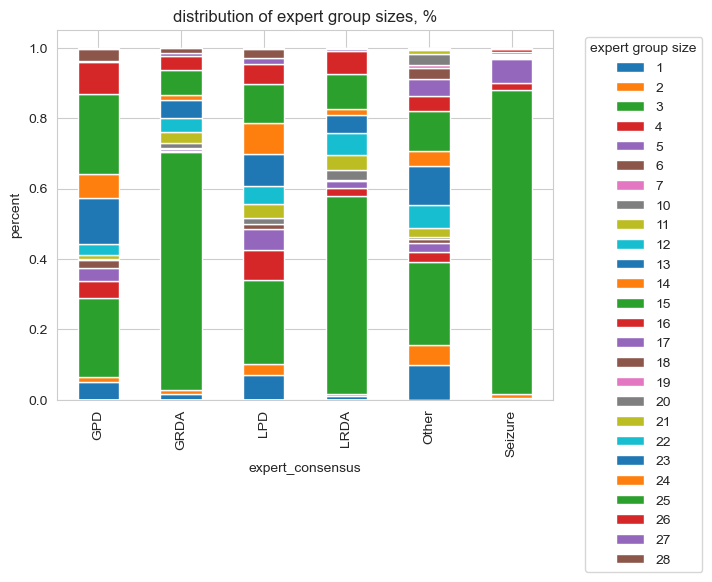

In [144]:

pivot_df=df_train.pivot_table(index='expert_consensus', columns='vote_count', values='eeg_id', aggfunc='count')
fig, ax = plt.subplots()
pivot_df.div(pivot_df.sum(axis=1), axis='index').plot(kind='bar', stacked=True, title='distribution of expert group sizes, %', ylabel='percent', ax=ax )
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='expert group size')

The df_train, created bellow, contains the num_distinct_vote_counts per eeg regardless of the category. For example, the eeg_id 2578018731 has two categories of expert consesus GRDA and other, and the total count of expert votes in GRDA is the same for all entries and the total count of expert votes is the same in Other. But in the num_distinct_vote_counts=2 for this eeg since the count of votes for GRDA is 13 and for Other is 1.

In [83]:
vote=['seizure_vote','gpd_vote',	'lrda_vote',		'other_vote' ,	'grda_vote',	'lpd_vote']


df_train=pd.read_csv(f'{data_path}/train.csv')
df_train['vote_count']=df_train[vote].sum(axis=1)
df_train['eeg_frequency']=df_train.groupby('eeg_id').eeg_id.transform('size')
df_train['num_distinct_vote_counts']=df_train.groupby('eeg_id').vote_count.transform('nunique')

a=['eeg_id', 'vote_count', 'expert_consensus', 'eeg_frequency', 'num_distinct_vote_counts']
df_train[a+vote].head()

,eeg_id,vote_count,expert_consensus,eeg_frequency,num_distinct_vote_counts,seizure_vote,gpd_vote,lrda_vote,other_vote,grda_vote,lpd_vote
0,1628180742,3,Seizure,9,1,3,0,0,0,0,0
1,1628180742,3,Seizure,9,1,3,0,0,0,0,0
2,1628180742,3,Seizure,9,1,3,0,0,0,0,0
3,1628180742,3,Seizure,9,1,3,0,0,0,0,0
4,1628180742,3,Seizure,9,1,3,0,0,0,0,0


For the entries that have num_distinct_vote_counts>1 we have the following summary.

In [93]:
display(df_train[df_train.num_distinct_vote_counts>1].groupby('expert_consensus').count()['eeg_id'])
print(f'total entries ' + str((df_train[df_train.num_distinct_vote_counts>1].groupby('expert_consensus').count()['eeg_id'].sum())))


expert_consensus
GPD        3367
GRDA       1086
LPD        5262
LRDA       2332
Other      2156
Seizure    9502
Name: eeg_id, dtype: int64

total entries 23705


In [13]:
df_train.pivot_table(index='expert_consensus', columns='num_distinct_vote_counts',values='vote_count', aggfunc='count' )


num_distinct_vote_counts,1,2,3,4,5,6,7,8,9
expert_consensus,,,,,,,,,
GPD,13335.0,2075.0,550.0,238.0,102.0,102.0,NaN,76.0,224.0
GRDA,17775.0,926.0,72.0,66.0,1.0,20.0,NaN,1.0,NaN
LPD,9594.0,1759.0,950.0,946.0,343.0,195.0,460.0,312.0,297.0
LRDA,14308.0,1085.0,386.0,332.0,207.0,100.0,199.0,23.0,NaN
Other,16652.0,1231.0,323.0,324.0,123.0,51.0,57.0,43.0,4.0
Seizure,11431.0,7782.0,944.0,332.0,214.0,72.0,42.0,28.0,88.0


In [53]:
df_train.pivot_table(index='num_distinct_vote_counts', columns='vote_count',values='eeg_id', aggfunc='count' )

vote_count,1,2,3,4,5,6,7,10,11,12,...,19,20,21,22,23,24,25,26,27,28
num_distinct_vote_counts,,,,,,,,,,,,,,,,,,,,,
1,3325.0,1838.0,41588.0,1357.0,1666.0,678.0,NaN,871.0,1797.0,3582.0,...,189.0,596.0,178.0,50.0,24.0,9.0,20.0,6.0,5.0,6.0
2,315.0,141.0,7791.0,606.0,1368.0,118.0,NaN,176.0,429.0,460.0,...,48.0,32.0,1.0,4.0,NaN,8.0,NaN,NaN,NaN,NaN
3,179.0,76.0,1000.0,451.0,341.0,37.0,NaN,67.0,121.0,208.0,...,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,224.0,72.0,453.0,413.0,223.0,16.0,NaN,25.0,128.0,67.0,...,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,94.0,30.0,284.0,179.0,65.0,7.0,NaN,6.0,64.0,14.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,26.0,17.0,117.0,110.0,78.0,12.0,3.0,NaN,50.0,7.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,61.0,12.0,312.0,138.0,78.0,4.0,NaN,NaN,3.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,50.0,22.0,160.0,94.0,73.0,5.0,NaN,1.0,7.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,86.0,108.0,162.0,103.0,82.0,6.0,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
def max_min(data):
    return data.max()-data.min()
df_temp=df_train[['eeg_id','expert_consensus','num_distinct_vote_counts', 'vote_count']].copy()
df_temp['max-min']=df_train.groupby(['eeg_id', 'expert_consensus']).vote_count.transform(func=max_min)
df_temp.pivot_table(index='num_distinct_vote_counts', columns='expert_consensus',values='max-min', aggfunc='max')

expert_consensus,GPD,GRDA,LPD,LRDA,Other,Seizure
num_distinct_vote_counts,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0
2,15.0,15.0,14.0,13.0,18.0,14.0
3,15.0,14.0,15.0,14.0,15.0,17.0
4,15.0,15.0,15.0,12.0,17.0,15.0
5,15.0,0.0,15.0,14.0,17.0,13.0
6,14.0,9.0,14.0,12.0,14.0,16.0
7,NaN,NaN,15.0,15.0,14.0,4.0
8,15.0,0.0,14.0,12.0,12.0,3.0
9,15.0,NaN,15.0,NaN,3.0,9.0


In the df_train_by_cat, created bellow, the difference in the feature num_distinct_vote_counts_by_cat counts number of different total expert votes for eeg within category. For example, the eeg_id 2578018731 has two categories of expert consesus GRDA and other. There is a separate count num_distinct_vote_counts_by_cat for each category. Since the number of total votes within each category does not differ, for each category num_distinct_vote_counts_by_cat is equal to 1. 

In [129]:


vote=['seizure_vote','gpd_vote',	'lrda_vote',		'other_vote' ,	'grda_vote',	'lpd_vote']
a_by_cat=['eeg_id', 'vote_count', 'expert_consensus', 'eeg_frequency_by_cat', 'num_distinct_vote_counts_by_cat']

df_train=pd.read_csv(f'{data_path}/train.csv')
df_train['vote_count']=df_train[vote].sum(axis=1)
df_train_by_cat=df_train.copy()
df_train_by_cat['eeg_frequency_by_cat']=df_train.groupby(['eeg_id','expert_consensus']).eeg_id.transform('size')
df_train_by_cat['num_distinct_vote_counts_by_cat']=df_train_by_cat.groupby(['eeg_id',  'expert_consensus']).vote_count.transform('nunique')

a_by_cat=['eeg_id', 'vote_count', 'expert_consensus', 'eeg_frequency_by_cat', 'num_distinct_vote_counts_by_cat']

df_train_by_cat[a_by_cat+vote].head()

,eeg_id,vote_count,expert_consensus,eeg_frequency_by_cat,num_distinct_vote_counts_by_cat,seizure_vote,gpd_vote,lrda_vote,other_vote,grda_vote,lpd_vote
0,1628180742,3,Seizure,9,1,3,0,0,0,0,0
1,1628180742,3,Seizure,9,1,3,0,0,0,0,0
2,1628180742,3,Seizure,9,1,3,0,0,0,0,0
3,1628180742,3,Seizure,9,1,3,0,0,0,0,0
4,1628180742,3,Seizure,9,1,3,0,0,0,0,0


Summary for the entries of df_train_by_cat where num_distinct_vote_counts_by_cat>1.

In [130]:
display(df_train_by_cat[df_train_by_cat.num_distinct_vote_counts_by_cat>1].groupby('expert_consensus').count()['eeg_id'])
print('total '+ str(df_train_by_cat[df_train_by_cat.num_distinct_vote_counts_by_cat>1].groupby('expert_consensus').count()['eeg_id'].sum()))

expert_consensus
GPD        2562
GRDA        571
LPD        4354
LRDA       1055
Other      1287
Seizure    7584
Name: eeg_id, dtype: int64

total 17413


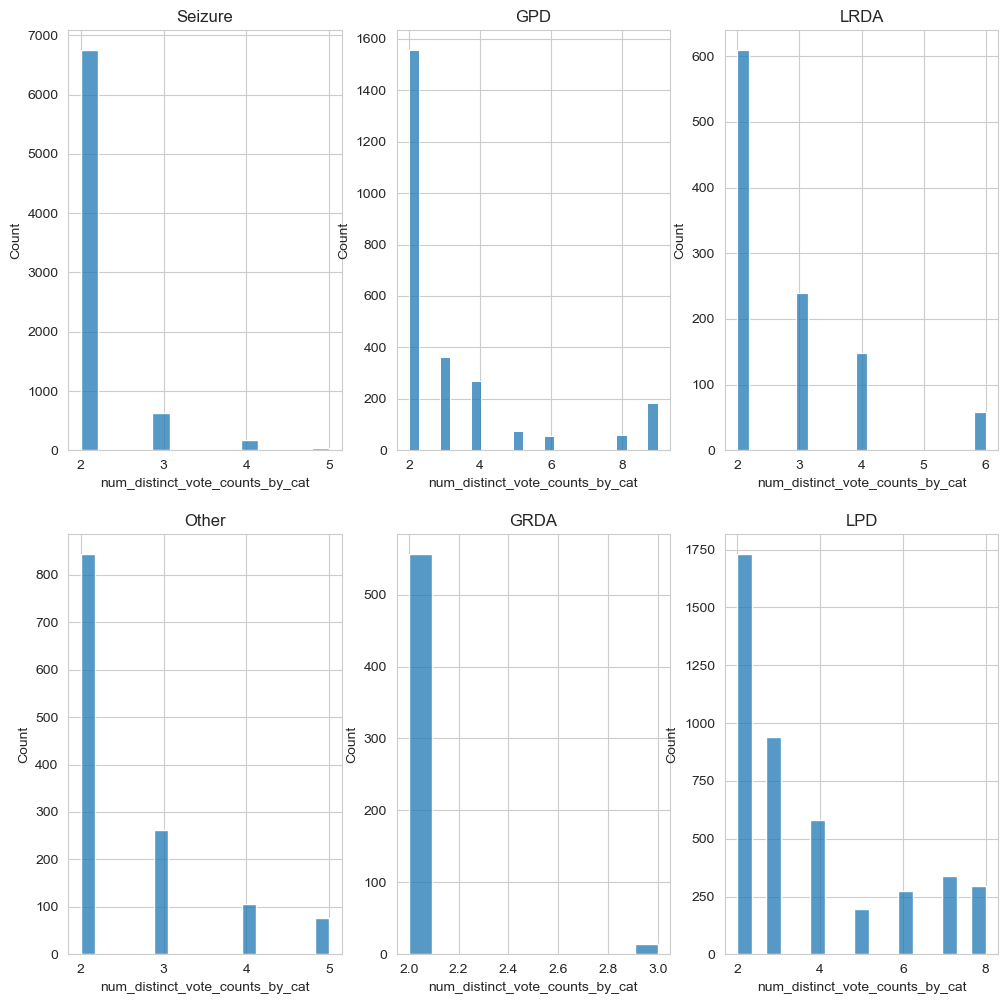

In [58]:
n=6 #num items
nrow=2
ncol=3
exp_consensus=df_train.expert_consensus.unique()
vote=['seizure_vote','gpd_vote',	'lrda_vote',		'other_vote' ,	'grda_vote',	'lpd_vote']
cat=['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD']

fig,axs=plt.subplots(nrow, ncol, figsize=(4*3, 4*2+4))
for i, ax in enumerate(fig.axes):
    sns.histplot(data=df_train_by_cat[df_train_by_cat.num_distinct_vote_counts_by_cat>1][df_train_by_cat[df_train_by_cat.num_distinct_vote_counts_by_cat>1].expert_consensus==cat[i]],
                 x='num_distinct_vote_counts_by_cat', ax=ax)
    ax.title.set_text(cat[i])
plt.show()

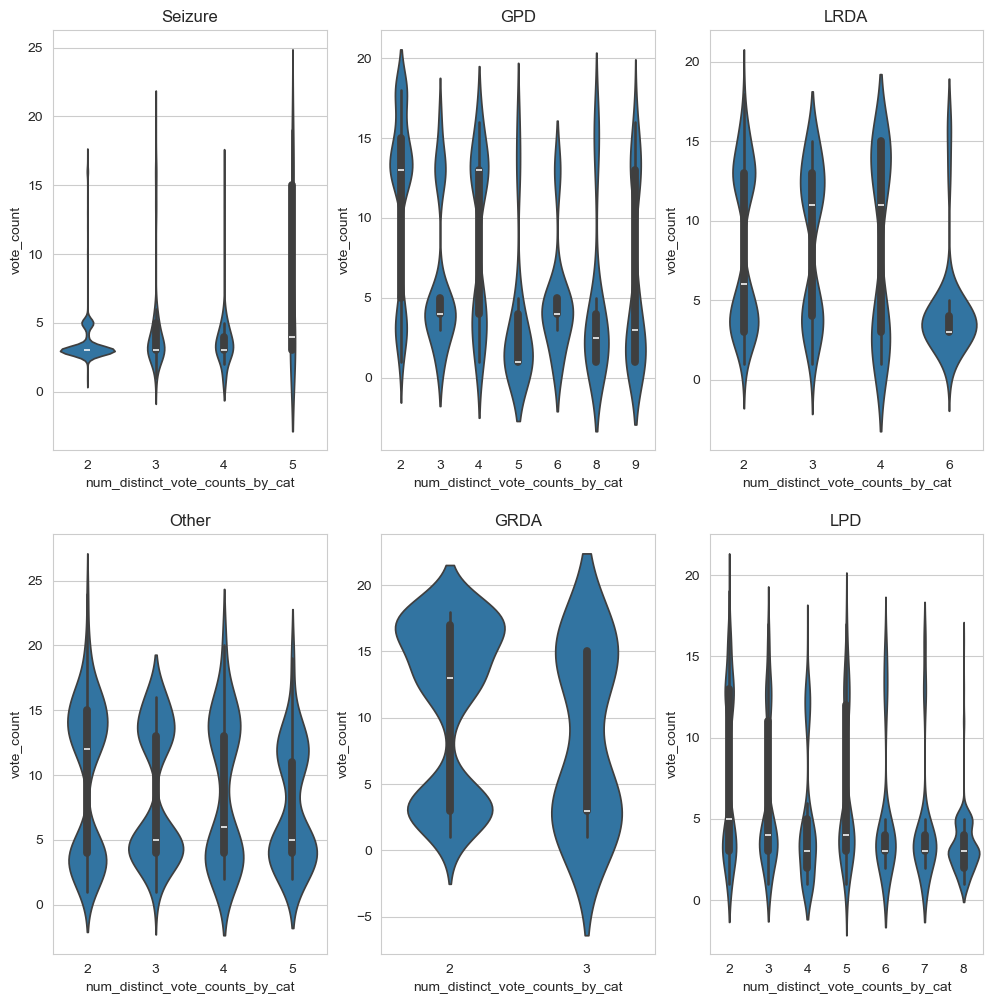

In [59]:
n=6 #num items
nrow=2
ncol=3
exp_consensus=df_train.expert_consensus.unique()
vote=['seizure_vote','gpd_vote',	'lrda_vote',		'other_vote' ,	'grda_vote',	'lpd_vote']
cat=['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD']

df_train_by_cat2=df_train_by_cat[df_train_by_cat.num_distinct_vote_counts_by_cat>1]

fig,axs=plt.subplots(nrow, ncol, figsize=(4*3, 4*2+4))
for i, ax in enumerate(fig.axes):
    sns.violinplot(data=df_train_by_cat2[df_train_by_cat2.expert_consensus==cat[i]],x='num_distinct_vote_counts_by_cat', y='vote_count', ax=ax)
    ax.title.set_text(cat[i])
plt.show()

In the following, we add the column diff_max_min_votes that accounts for the difference between max and min number of total votes for eeg within a single category.

In [68]:
df_temp=df_train_by_cat.copy()
df_temp['diff_max_min_votes']=df_temp.groupby(['eeg_id', 'expert_consensus']).vote_count.transform(lambda x: x.max()-x.min())
df_temp[a_by_cat+['diff_max_min_votes']+vote]

,eeg_id,vote_count,expert_consensus,eeg_frequency_by_cat,num_distinct_vote_counts_by_cat,diff_max_min_votes,seizure_vote,gpd_vote,lrda_vote,other_vote,grda_vote,lpd_vote
0,1628180742,3,Seizure,9,1,0,3,0,0,0,0,0
1,1628180742,3,Seizure,9,1,0,3,0,0,0,0,0
2,1628180742,3,Seizure,9,1,0,3,0,0,0,0,0
3,1628180742,3,Seizure,9,1,0,3,0,0,0,0,0
4,1628180742,3,Seizure,9,1,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,3,LRDA,11,1,0,0,0,3,0,0,0
106796,351917269,3,LRDA,11,1,0,0,0,3,0,0,0
106797,351917269,3,LRDA,11,1,0,0,0,3,0,0,0
106798,351917269,3,LRDA,11,1,0,0,0,3,0,0,0


In the following histogram, we count the number of time certain difference between max size and min size of expert size groups, by eeg by category of expert consensus. This is supposed to capture how varied the size of the expert size groups are. For example, for Seizures most expert groups differe only by 2 in size. Whereas for other categories, the sizes of groups vary a lot more. For example, for LPD and GDP significant number of eeg vary in the size of the expert groups by at least 9 experts. 

<Axes: title={'center': 'count of (max-min) of total votes by eeg by category'}, xlabel='expert_consensus'>

<Figure size 2000x1000 with 0 Axes>

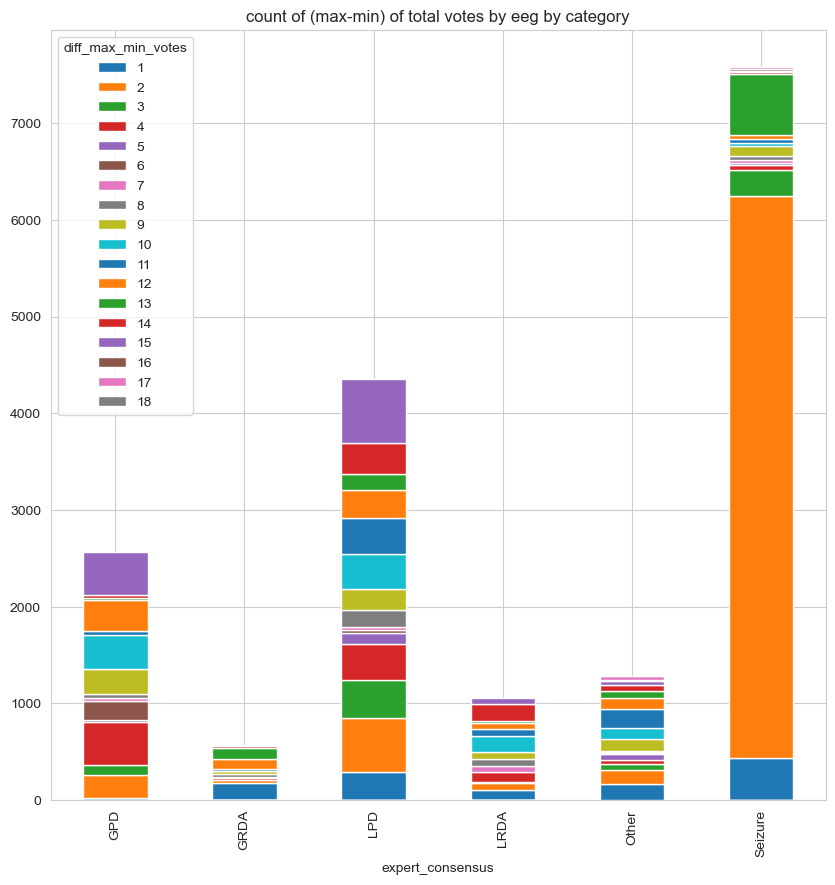

In [131]:
pivot_df=df_temp[df_temp.num_distinct_vote_counts_by_cat>1].pivot_table(index='expert_consensus', columns='diff_max_min_votes', values='num_distinct_vote_counts_by_cat', aggfunc='count')
plt.figure(figsize=(20, 10))
pivot_df.plot( kind='bar', stacked=True, title='count of (max-min) of total votes by eeg by category')

In [71]:
df_temp.pivot_table(index='expert_consensus', columns='diff_max_min_votes', values='num_distinct_vote_counts_by_cat', aggfunc='count')

diff_max_min_votes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
expert_consensus,,,,,,,,,,,,,,,,,,,
GPD,14140.0,22.0,237.0,104.0,446.0,16.0,202.0,35.0,36.0,260.0,347.0,42.0,319.0,25.0,26.0,445.0,NaN,NaN,NaN
GRDA,18290.0,178.0,34.0,NaN,21.0,NaN,NaN,12.0,30.0,28.0,3.0,17.0,102.0,116.0,20.0,10.0,NaN,NaN,NaN
LPD,10502.0,289.0,562.0,393.0,374.0,114.0,24.0,35.0,181.0,207.0,364.0,377.0,292.0,159.0,321.0,662.0,NaN,NaN,NaN
LRDA,15585.0,105.0,76.0,11.0,103.0,NaN,NaN,54.0,80.0,73.0,159.0,79.0,57.0,21.0,179.0,58.0,NaN,NaN,NaN
Other,17521.0,167.0,149.0,62.0,36.0,68.0,10.0,11.0,3.0,129.0,113.0,199.0,114.0,73.0,53.0,47.0,9.0,38.0,6.0
Seizure,13349.0,437.0,5810.0,268.0,54.0,19.0,NaN,34.0,44.0,104.0,28.0,40.0,41.0,632.0,17.0,12.0,18.0,26.0,NaN


In [72]:
df_temp.pivot_table(index='expert_consensus', columns='num_distinct_vote_counts_by_cat',values='vote_count', aggfunc='count' )


num_distinct_vote_counts_by_cat,1,2,3,4,5,6,7,8,9
expert_consensus,,,,,,,,,
GPD,14140.0,1555.0,364.0,268.0,77.0,55.0,NaN,60.0,183.0
GRDA,18290.0,556.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
LPD,10502.0,1730.0,938.0,579.0,196.0,274.0,340.0,297.0,NaN
LRDA,15585.0,609.0,240.0,148.0,NaN,58.0,NaN,NaN,NaN
Other,17521.0,843.0,262.0,105.0,77.0,NaN,NaN,NaN,NaN
Seizure,13349.0,6746.0,626.0,179.0,33.0,NaN,NaN,NaN,NaN


In [73]:
df_temp.pivot_table(index='num_distinct_vote_counts_by_cat', columns='vote_count',values='eeg_id', aggfunc='count' )

vote_count,1,2,3,4,5,6,7,10,11,12,...,19,20,21,22,23,24,25,26,27,28
num_distinct_vote_counts_by_cat,,,,,,,,,,,,,,,,,,,,,
1,3445.0,1942.0,44079.0,1836.0,1885.0,734.0,NaN,1074.0,2270.0,3981.0,...,223.0,619.0,178.0,50.0,24.0,9.0,20.0,6.0,5.0,6.0
2,307.0,132.0,6268.0,624.0,1461.0,89.0,NaN,69.0,151.0,288.0,...,23.0,9.0,1.0,4.0,NaN,8.0,NaN,NaN,NaN,NaN
3,159.0,61.0,737.0,468.0,337.0,32.0,NaN,1.0,103.0,35.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,207.0,47.0,292.0,212.0,112.0,24.0,NaN,2.0,46.0,37.0,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,54.0,13.0,86.0,74.0,42.0,1.0,3.0,NaN,22.0,11.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,42.0,7.0,134.0,107.0,38.0,NaN,NaN,NaN,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,44.0,6.0,146.0,80.0,22.0,NaN,NaN,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,44.0,78.0,117.0,38.0,65.0,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,58.0,30.0,8.0,12.0,12.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df_temp.pivot_table(index='num_distinct_vote_counts_by_cat', columns='expert_consensus',values='diff_max_min_votes', aggfunc='max')

expert_consensus,GPD,GRDA,LPD,LRDA,Other,Seizure
num_distinct_vote_counts_by_cat,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0
2,15.0,15.0,14.0,14.0,18.0,14.0
3,15.0,14.0,15.0,14.0,15.0,17.0
4,15.0,NaN,15.0,14.0,17.0,13.0
5,15.0,NaN,14.0,NaN,17.0,16.0
6,12.0,NaN,14.0,15.0,NaN,NaN
7,NaN,NaN,15.0,NaN,NaN,NaN
8,15.0,NaN,15.0,NaN,NaN,NaN
9,15.0,NaN,NaN,NaN,NaN,NaN
